## Estimating the Bias of a Coin with Frequentist and Bayesian Methods

You are working on a project to determine the bias of a coin – that is, the probability that the coin lands on heads when flipped. You have been tasked to approach the problem from both a frequentist and a Bayesian perspective and compare the results.

For the frequentist approach, you need to estimate the bias of the coin as the proportion of heads observed in a series of coin flips. However, you also want to incorporate prior beliefs about the coin's bias using the Bayesian approach. For this, you need to represent different states of belief about the bias: no initial preference (uniform belief), a belief that the coin is biased towards tails, and a belief that it is biased towards heads.

The simulation must be reproducible, so you have to set a random seed before generating the coin flips. After simulating a small number of flips (let's say 10 flips to illustrate the concept with a small sample size), you'll need to visualize the frequentist estimate and the Bayesian priors and posteriors to compare how each prior affects the posterior belief about the coin's bias after observing the data.

The project requires you to plot the frequentist estimate as a vertical line and to use Beta distributions for the Bayesian priors and posteriors. Each prior and posterior distribution should be plotted on the same graph to easily compare the different beliefs. Finally, present your findings in a way that a non-technical audience can understand, explaining the differences between the frequentist and Bayesian estimates. The code for the plots is already completed, you just need to compute the value for the variables.

Your Python code should perform the following steps:

- Set a seed to make the simulation reproducible.
- Simulate 10 coin flips assuming a true bias (e.g., 70% heads).
- Calculate the frequentist estimate for the coin's bias.
- Define different priors to represent different beliefs about the coin's bias.
- For each prior, calculate the Bayesian posterior by updating the prior with the observed number of heads and tails.
- Plot both the frequentist estimate and the Bayesian priors and posteriors on the same graph.
- Show the resulting graph.

### Things to remember:

1. The probability mass function (PMF) of a coin toss follows a binomial distribution because a coin toss is a Bernoulli trial, which is a random experiment where there are exactly two possible outcomes - usually termed "success" and "failure".

$$
P(X = k) = \binom{n}{k} p^k (1-p)^{n-k}
$$

2. The Bayesian approach to updating beliefs in the context of a binomial likelihood function involves using the beta distribution as the prior because it is the conjugate prior for the binomial likelihood.

$$
\text{Posterior} \propto \text{Likelihood} \times \text{Prior}
$$

3. The beta prior has a PDF as follows:

$$
f(p|\alpha, \beta) = \frac{p^{\alpha - 1}(1 - p)^{\beta - 1}}{B(\alpha, \beta)}
$$

4. You can use the `beta` function from the `scipy.stats` library, and the `binomial` from the `numpy.random` library.


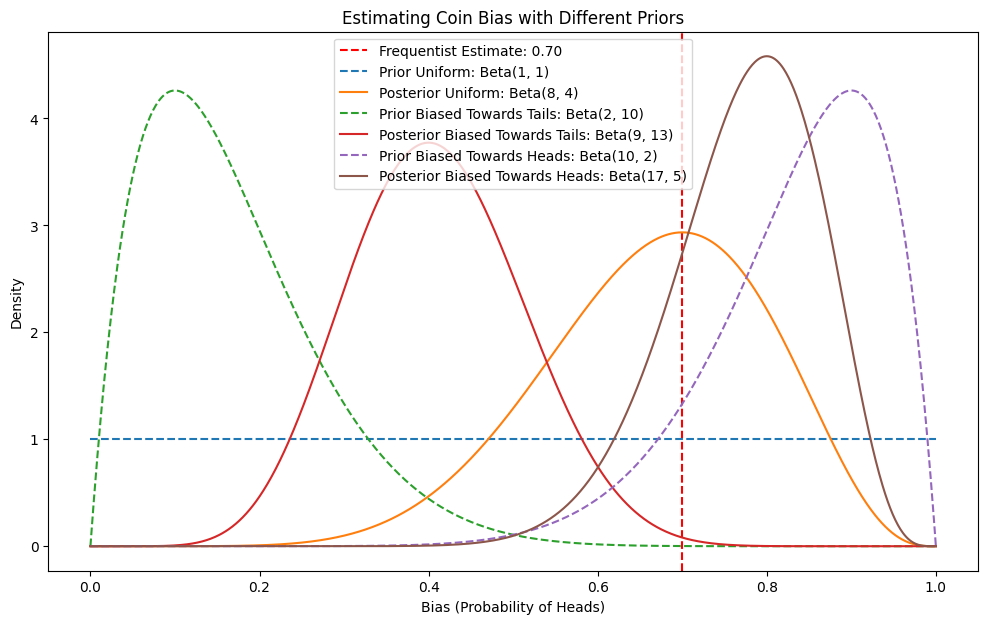

17


In [9]:
import numpy as np
from scipy.stats import beta
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# True bias of the coin (for simulation purposes)
bias = np.array([0.3,0.7])

# Reduce sample size
sampleSize = 10

# Simulate N coin flips (1 is heads, 0 is tails)
flips = np.random.choice(2,sampleSize,p=biasHeads)

# Frequentist Approach: Estimate bias as proportion of heads
frequentist_estimate = np.sum(flips)/sampleSize

# Define different priors
priors = {
    "Uniform": (1, 1),
    "Biased Towards Tails": (2, 10),
    "Biased Towards Heads": (10, 2)
}

plt.figure(figsize=(12, 7))
x = np.linspace(0, 1, 1000)

# Plot the Frequentist Estimate
plt.axvline(frequentist_estimate, color='red', linestyle='--', label=f'Frequentist Estimate: {frequentist_estimate:.2f}')

for label, (alpha_prior, beta_prior) in priors.items():
    # Bayesian Approach: Update the prior with observed data
    alpha_posterior = alpha_prior+np.sum(flips)
    beta_posterior = (sampleSize-np.sum(flips)+beta_prior)

    # Plot the prior and posterior distributions
    plt.plot(x, beta.pdf(x, alpha_prior, beta_prior), '--', label=f'Prior {label}: Beta({alpha_prior}, {beta_prior})')
    plt.plot(x, beta.pdf(x, alpha_posterior, beta_posterior), label=f'Posterior {label}: Beta({alpha_posterior}, {beta_posterior})')

plt.title("Estimating Coin Bias with Different Priors")
plt.xlabel("Bias (Probability of Heads)")
plt.ylabel("Density")
plt.legend()
plt.show()
print(alpha_posterior)


The frequentist estimate is only taking into account the amount of times that the heads have appeared in the 10 flips, it causes the idea that the probability for future heads is exactly the amount of heads divided by the amount of flips, which sometimes can be not correct because the amount of times a coin flip turns into heads does not reflect the bias in small amounts of flips.

In the other hand, we have the Bayesian estimate, which allows us to incorporate previous ideas of the bias of the coin and we can update them based on what we get from the flips, which gives us a new probability of getting a head or a tail in the next try.

In this situation we can see that the uniform probability tends towards the frequentist estimate once it is updated.
Tails probability is updated and became in a position between the frequentist estimate and the original tails probability.
Finally the heads probability tends to the heads original probability, but tends to the frequentist stimate too.

## Comments:

Increment the number of coin flips until 100 in increments of 10. What do you observe? Is it what you expected? Why?

*The more we increase the number of flip coins done with the determined bias of the coin, we can see that the result of the updated probabilities tend to be more closer one from each other and closer to the bias of the coin and the frequentist estimate, this can be seen in the images bellow the following code.*

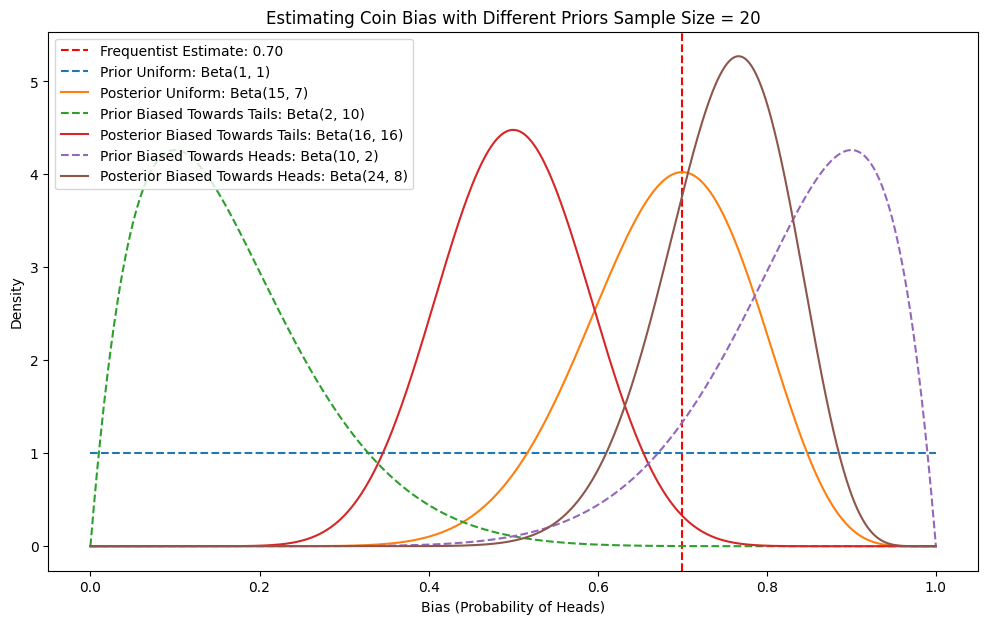

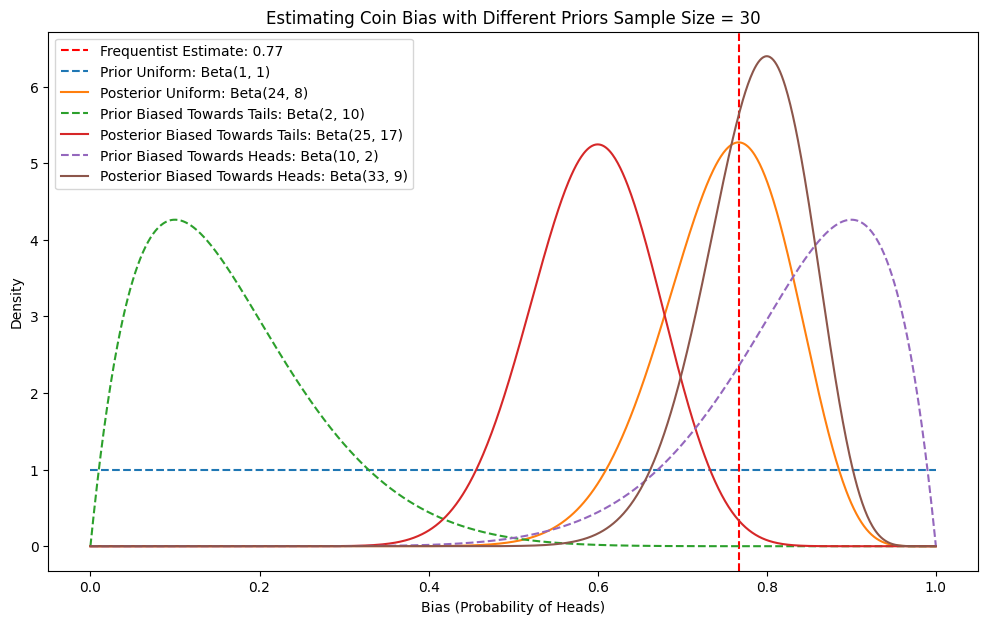

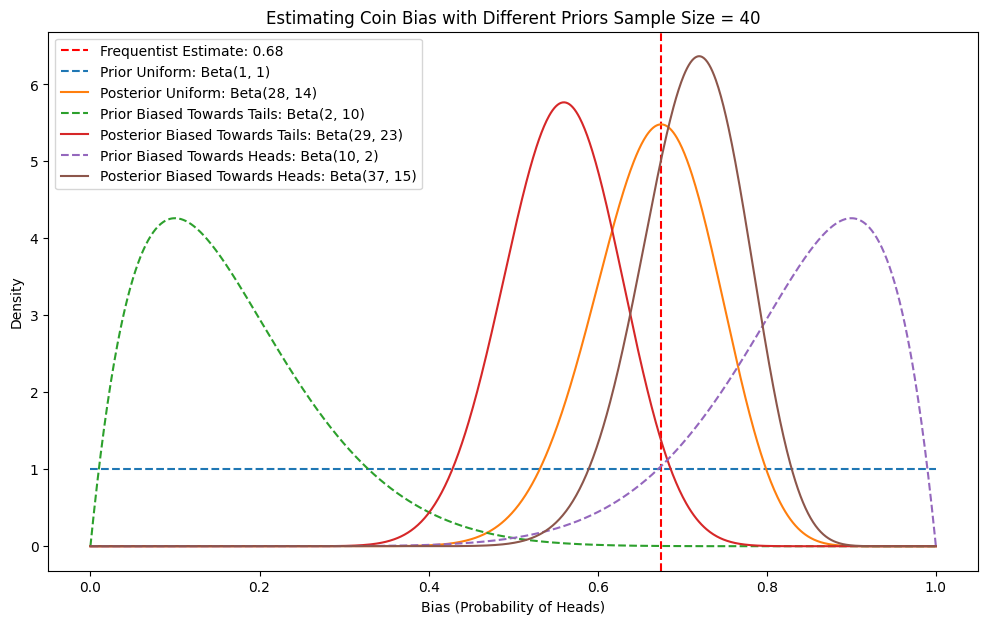

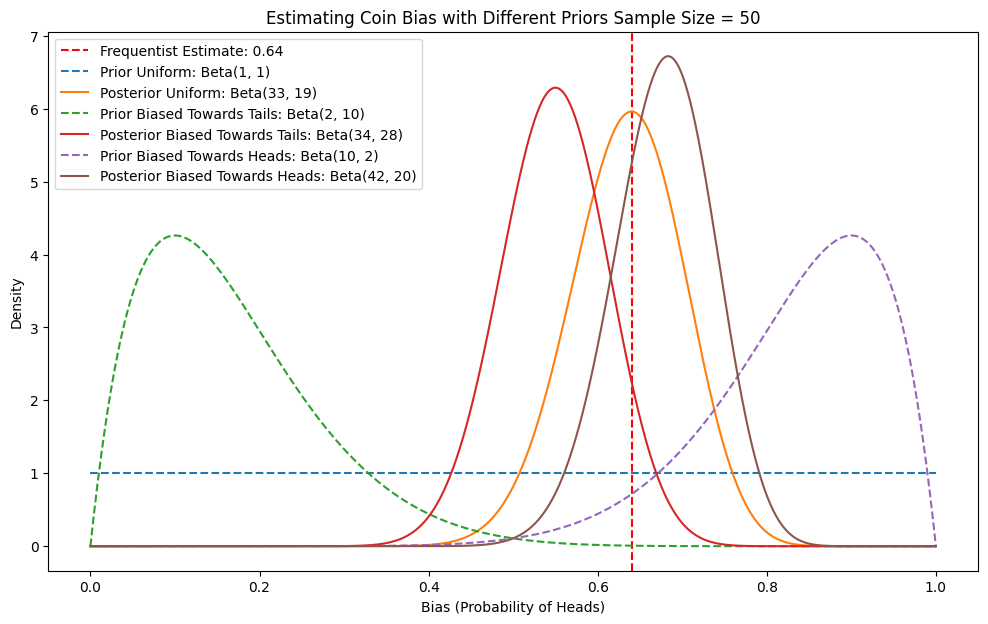

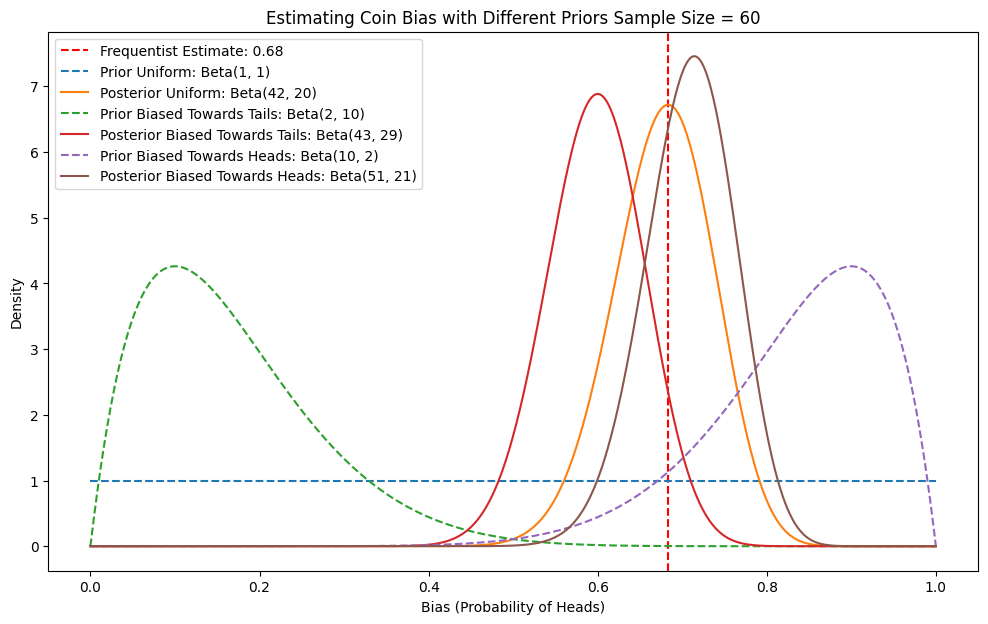

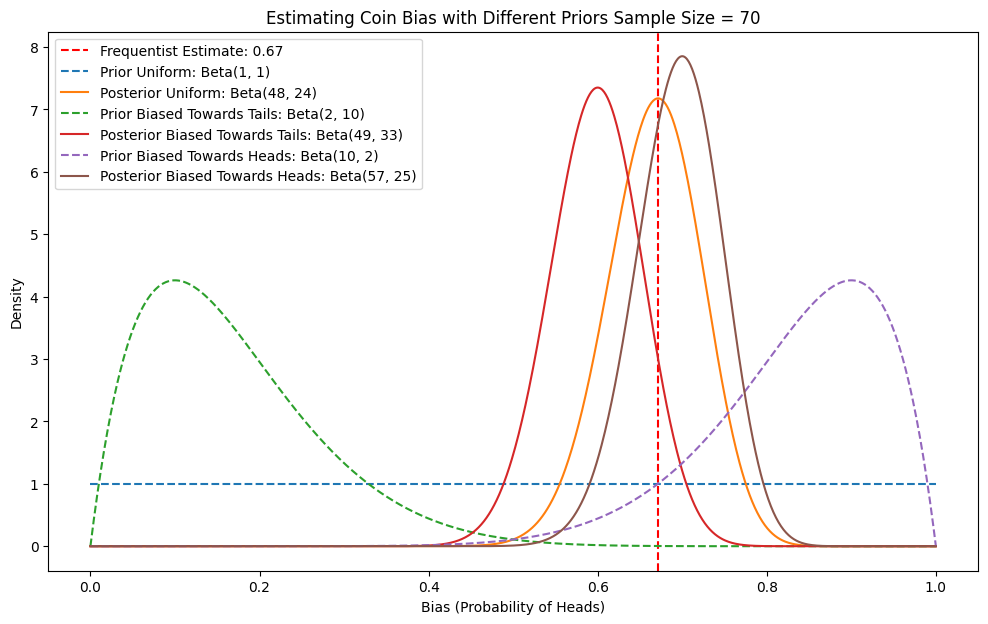

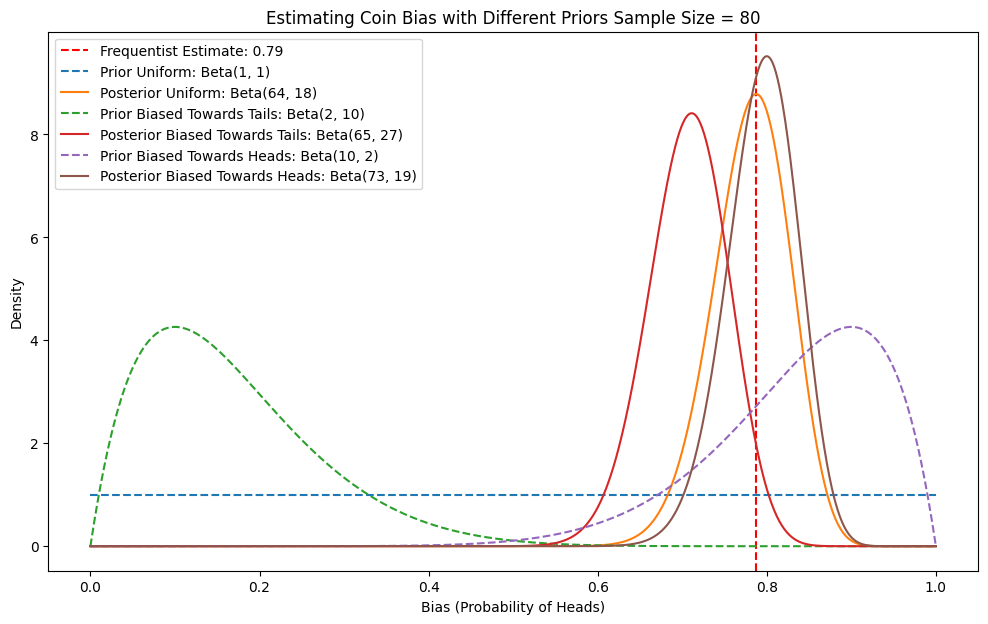

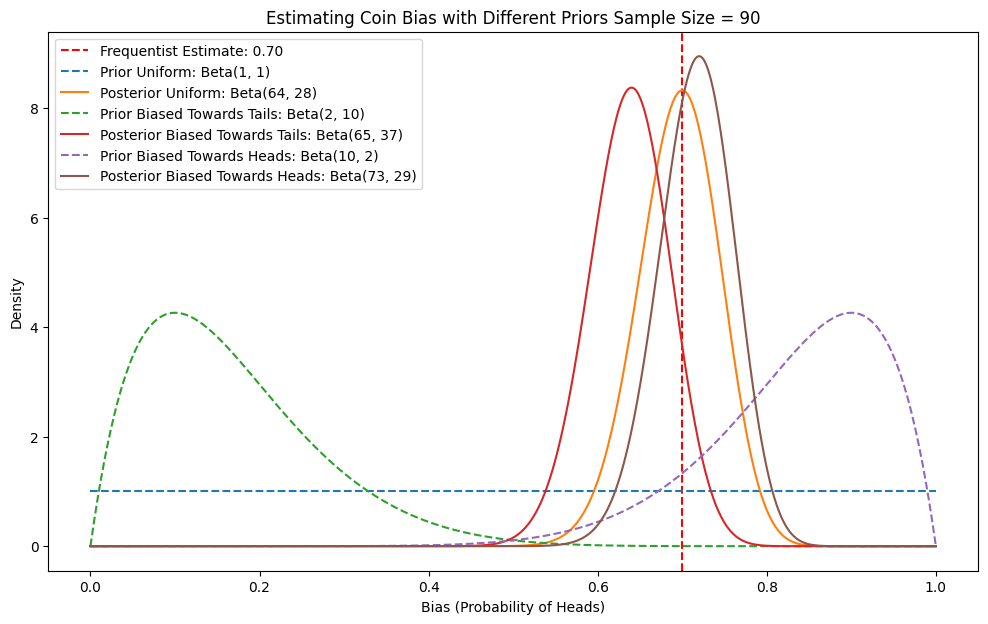

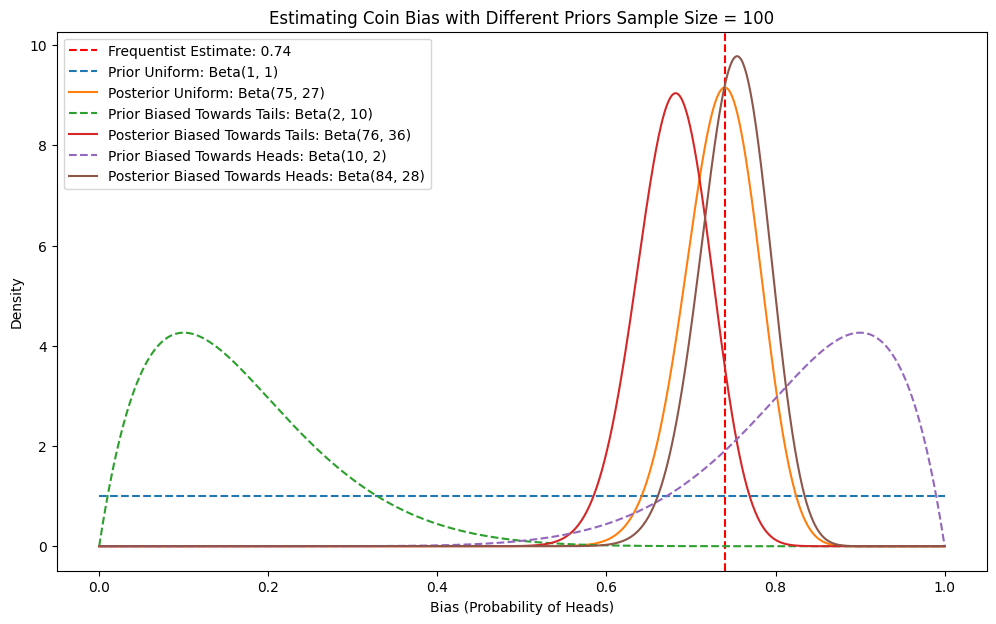

In [16]:
sampleSize = 20
while sampleSize < 101:
  # Simulate N coin flips (1 is heads, 0 is tails)
  flips = np.random.choice(2,sampleSize,p=biasHeads)

  # Frequentist Approach: Estimate bias as proportion of heads
  frequentist_estimate = np.sum(flips)/sampleSize

  # Define different priors
  priors = {
      "Uniform": (1, 1),
      "Biased Towards Tails": (2, 10),
      "Biased Towards Heads": (10, 2)
  }

  plt.figure(figsize=(12, 7))
  x = np.linspace(0, 1, 1000)

  # Plot the Frequentist Estimate
  plt.axvline(frequentist_estimate, color='red', linestyle='--', label=f'Frequentist Estimate: {frequentist_estimate:.2f}')

  for label, (alpha_prior, beta_prior) in priors.items():
      # Bayesian Approach: Update the prior with observed data
      alpha_posterior = alpha_prior+np.sum(flips)
      beta_posterior = (sampleSize-np.sum(flips)+beta_prior)

      # Plot the prior and posterior distributions
      plt.plot(x, beta.pdf(x, alpha_prior, beta_prior), '--', label=f'Prior {label}: Beta({alpha_prior}, {beta_prior})')
      plt.plot(x, beta.pdf(x, alpha_posterior, beta_posterior), label=f'Posterior {label}: Beta({alpha_posterior}, {beta_posterior})')
  title = "Estimating Coin Bias with Different Priors Sample Size = "+ str(sampleSize)
  plt.title(title)
  plt.xlabel("Bias (Probability of Heads)")
  plt.ylabel("Density")
  plt.legend()
  plt.show()
  sampleSize += 10